<a href="https://colab.research.google.com/github/Mathewvarughese/MachineLearningCourse-Siraj/blob/master/Week2_9thSept_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

#Import data
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

!pip install yfinance --upgrade --no-cache-dir
yf.pdr_override()

  Created wheel for yfinance: filename=yfinance-0.1.45-cp36-none-any.whl size=14652 sha256=a51160bb114a63e49cb3d4307756c28a6d8b12421ff5847f6d0f03b4b25485ad
  Stored in directory: /tmp/pip-ephem-wheel-cache-w_x85tob/wheels/0c/d1/df/aa9a7744a4ac353cc9a1f2c3aaea7c1f457fc49de4286f2d88
Successfully built yfinance


In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
%cd "/content/drive/My Drive/Week2_Homework1"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Week2_Homework1


In [0]:
#Modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

#Modelling metrics
from sklearn import metrics

In [5]:
#IMport data and discovery
df_full = pdr.get_data_yahoo("AAPL", start="2018-01-01").reset_index()
df_full.to_csv('output/AAPL.csv',index=False)

[*********************100%***********************]  1 of 1 downloaded


In [6]:
df_full.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,170.160004,172.300003,169.259995,172.259995,167.701889,25555900
1,2018-01-03,172.529999,174.550003,171.960007,172.229996,167.672668,29517900
2,2018-01-04,172.539993,173.470001,172.080002,173.029999,168.451508,22434600
3,2018-01-05,173.440002,175.369995,173.050003,175.000000,170.369385,23660000
4,2018-01-08,174.350006,175.610001,173.929993,174.350006,169.736588,20567800


In [7]:
df-full.shape

NameError: ignored

In [8]:
df_full.shape

(424, 7)

In [10]:
df_full.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

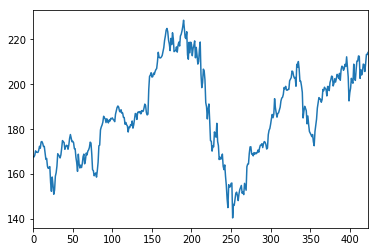

In [14]:
df_full["Adj Close"].plot()

In [0]:
df_full.set_index("Date", inplace=True)

In [0]:
window_size=32
num_samples=len(df_full)-window_size

In [23]:
np.arange(num_samples).astype(np.int)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [0]:
window_size=32
num_samples=len(df_full)-window_size
#Get indices of access of the data
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)

data = df_full['Adj Close'].values[indices]
x = data[:,:-1]
y = data[:,-1]

In [32]:
indices

array([[  0,   1,   2, ...,  30,  31,  32],
       [  1,   2,   3, ...,  31,  32,  33],
       [  2,   3,   4, ...,  32,  33,  34],
       ...,
       [389, 390, 391, ..., 419, 420, 421],
       [390, 391, 392, ..., 420, 421, 422],
       [391, 392, 393, ..., 421, 422, 423]])

In [34]:
data

array([[167.701889, 167.672668, 168.451508, ..., 163.605591, 169.099213,
        168.551804],
       [167.672668, 168.451508, 170.369385, ..., 169.099213, 168.551804,
        167.984848],
       [168.451508, 170.369385, 169.736588, ..., 168.551804, 167.984848,
        167.222412],
       ...,
       [206.435654, 208.049515, 207.880173, ..., 205.699997, 209.190002,
        213.279999],
       [208.049515, 207.880173, 206.23642 , ..., 209.190002, 213.279999,
        213.259995],
       [207.880173, 206.23642 , 206.95369 , ..., 213.279999, 213.259995,
        214.169998]])

In [35]:
data.shape

(392, 33)

In [0]:
split_fraction=0.8
ind_split=int(split_fraction*num_samples)

In [0]:
x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]


In [39]:
x_test.shape

(79, 32)

In [0]:
#Help Functions
def get_performance (model_pred):
  #Function returns stand perf metrics
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred).round(4)))
        

        


In [0]:
        
def get_plot (model_pred):
    plt.scatter(model_pred, y_test, color="gray")
    plt.plot(y_test, y_test, color='red', linewidth=2)

In [0]:
y_pred_lag=np.roll(y_test,1)

In [52]:
get_performance(y_pred_lag)


Mean Absolute Error: 2.8479
Mean Squared Error: 19.4571
Root Mean Squared Error: 4.411020290136966


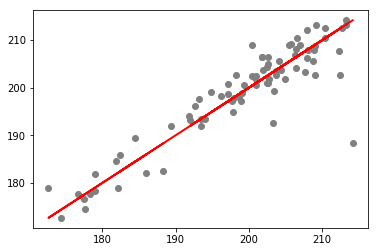

In [53]:
get_plot(y_pred_lag)

### **Linear Regression**

In [0]:
model_lr=LinearRegression()
model_lr.fit(x_train, y_train)

In [0]:
y_pred_lr=model_lr.predict(x_test)

In [58]:
get_performance(y_pred_lr)

Mean Absolute Error: 2.8938
Mean Squared Error: 13.045
Root Mean Squared Error: 3.61178626167164


# **Ridge Regression**

In [0]:
model_ridge=Ridge()
model_ridge.fit(x_train, y_train)

y_pred_ridge=model_ridge.predict(x_test)

In [60]:
get_performance(y_pred_ridge)

Mean Absolute Error: 2.8935
Mean Squared Error: 13.0427
Root Mean Squared Error: 3.611467845627315


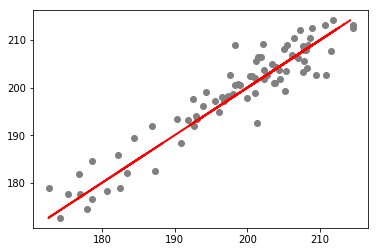

In [61]:
get_plot(y_pred_ridge)

## **Gradient Boosting Trees**

In [0]:
model_gb=GradientBoostingRegressor()
model_gb.fit(x_train, y_train)

y_pred_gb = model_gb.predict(x_test)

In [66]:
get_performance(y_pred_gb)

Mean Absolute Error: 3.3094
Mean Squared Error: 16.0372
Root Mean Squared Error: 4.004647300324961


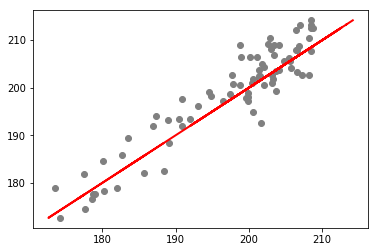

In [67]:
get_plot(y_pred_gb)

## **Comparison**

In [0]:
df_comp=pd.DataFrame({"lag":np.absolute(y_test-y_pred_lag),
                     "lr":np.absolute(y_test-y_pred_lr),
                     "ridge":np.absolute(y_test-y_pred_ridge),
                     "gb":np.absolute(y_test-y_pred_gb)})

(9, 20)

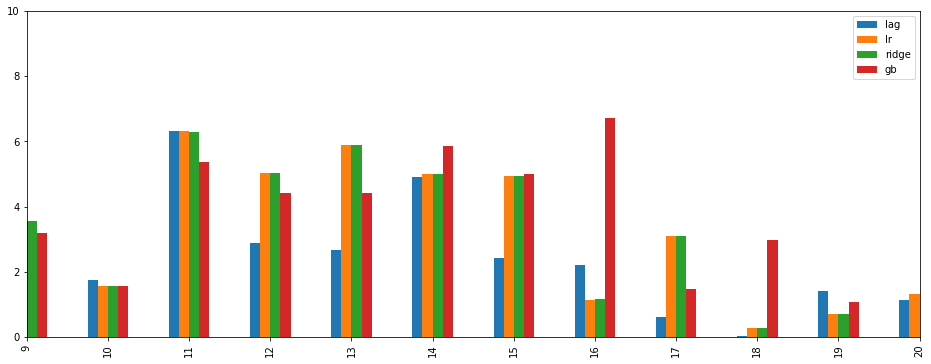

In [73]:
df_comp.plot.bar(figsize=(16, 6))
plt.ylim(0,10)
plt.xlim(9,20)